In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

### EDA what I want to do for EDA
* the most common words
* average length
* likes/retweets with time
* setiment analysis
### next step would be topic modeling and text classification

In [89]:
data=pd.read_pickle('virus.pkl')
data_cl=pd.read_pickle('data_cleaned.pkl')


In [90]:
data_cl=pd.DataFrame(data=data_cl)
data_cl.head()
# after analysis find lost of duplicaed could be problematic, get rid of duplicated 


,tweets
0,imp data of patients with coronavirus 2019ncov...
1,new jama study 41 of first 138 patients w ncov...
2,where did they go millions left wuhan before q...
3,pictures from the wuhan vocational college of ...
4,ncov updatesg govt has stepped up the risk ass...


In [91]:
#conduct sentiment analysis
from textblob import TextBlob

data_cl['polarity'] = data_cl['tweets'].apply(lambda x: TextBlob(x).sentiment.polarity)
data_cl['subjectivity'] = data_cl['tweets'].apply(lambda x: TextBlob(x).sentiment.subjectivity )
data['polarity']=data_cl.polarity
data['subjectivity']=data_cl.subjectivity
data.head()

,tweets,id,date,source,likes,retweets,len,polarity,subjectivity
0,Imp data of patients with #coronavirus #2019_n...,1226711943035011072,2020-02-10 03:38:13,Twitter for iPad,0,22,284,0.375000,0.87500
1,New @JAMA study: 41% of first 138 patients w/ ...,1226710621128839171,2020-02-10 03:32:57,Twitter Web App,0,180,181,0.128788,0.29596
2,Where did they go? Millions left Wuhan before ...,1226710056177029122,2020-02-10 03:30:43,Twitter Web App,0,0,139,0.000000,0.00000
3,Pictures from the Wuhan Vocational College of ...,1226708985543262209,2020-02-10 03:26:27,Twitter for Android,0,23,301,0.150000,0.20000
4,[nCOV update]SG Govt has stepped up the risk a...,1226706851481313283,2020-02-10 03:17:59,Twitter Web App,3,0,280,0.175000,0.27500


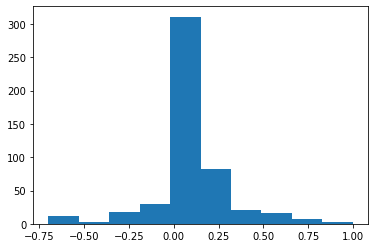

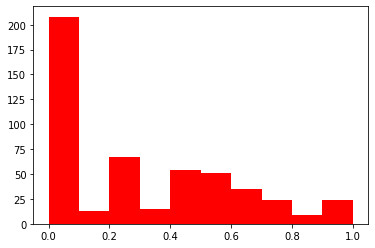

0.06821590187590185
0.29207989380989435


In [92]:
plt.hist(data.polarity)
plt.show()
plt.hist(data.subjectivity,color='r')
plt.show()
print(np.mean(data.polarity))
print(np.mean(data.subjectivity))

From the plot and result above. Most of those tiwtter regaring NCov are netural and objectivity.
* I don't thinkt the output is reliable
* notice there are many repeted, should adress that?

In [61]:
# take a look of what positvie and negative tweets
df1_p=data[data.polarity>.5]
df1_p.head()
for tweet in df1_p.tweets:
    print(tweet)
print('above are positvie tweet')    

# that's mainly about individual contributors and analysis/article done for corvruss


The death toll from a coronavirus outbreak in mainland China rose to 908 as of the end of Sunday, the National Health Commission said on Monday.

https://t.co/dNG56lUHGc
Filipinos from Wuhan get 'loving' welcome from Tarlac after protests: mayor #nCoV #coronavirus https://t.co/mrMUohiVPq
Filipinos from Wuhan get 'loving' welcome from Tarlac after protests: mayor #nCoV #coronavirus https://t.co/mrMUohiVPq
Filipinos from Wuhan get 'loving' welcome from Tarlac after protests: mayor https://t.co/lLkCBY8kY4 #nCoV #coronavirus
@SenTomCotton @willchamberlain @TheLancet Best analysis of the origin of the #coronavirus is here:  https://t.co/Zk30siYr4i
@FifeTx @TruckDr62247354 @mel_faith1 I don't think we're gonna know the truth for a while

The alternatives are that #China's govt. released 2019-nCoV #Wuhan #coronavirus deliberately to kill their own peeps

Or

Another entity released it accidentally

Or

Another entity released it deliberately
@Ricky78c9 In honor of those who have been lost ple

In [62]:
# take a peek at opionable tweets
df1_sub= data[data.subjectivity>.5]
for tweet in df1_sub.tweets:
    print(tweet)

Imp data of patients with #coronavirus #2019_nCoV-infected pneumonia in #Wuhan, China published in @JAMA_current

-26% required ICU care
-4.3% mortality
-Significant infection transmission to hosp patients &amp; healthcare professionals

#cdnhealth #medtwitter
https://t.co/bdwKDpLzMf
Scary:
"Various epidemiological models estimate that the real number of cases is 100,000 or even more."  

https://t.co/sbgqflqmaG

#Coronavirus #2019-nCoV
Philippines 2019-nCoV
3 confirmed:
1-recovered(?)
1-died
1-went back to china

267 PUI:
230-in hospitals
19-discharged
13-refused to be hospitalized
2-died (not nCoV?🤔)

new:
32-in quarantine (just arrived from Wuhan)

those PUI's are questionable
#coronavirusPH #coronavirus https://t.co/hDHVJmIews
Scary:
"Various epidemiological models estimate that the real number of cases is 100,000 or even more."  

https://t.co/sbgqflqmaG

#Coronavirus #2019-nCoV
#brutal #WuhanLockDown, &amp; force quarantine not only cause more death, they also violate human right

In [95]:
# get rid of duplicate
original_full_text_data=data.copy()
data.drop_duplicates('tweets',keep='first',inplace=True)
data.shape


(180, 9)

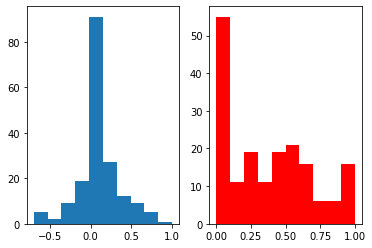

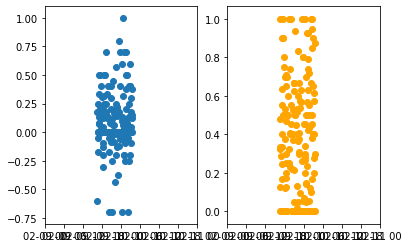

In [147]:
# distribution of polarity and subjectivity
plt.subplot(1,2,1)
plt.hist(data.polarity)
plt.subplot(1,2,2)
plt.hist(data.subjectivity,color='r')
plt.show()

# let's see the trend of sentiment analysis (if there anything interesting?)
import datetime
plt.subplot(1,2,1)
plt.xlim([datetime.date(2020, 2, 9), datetime.date(2020, 2, 11)])
plt.scatter(data.date,data.polarity)
plt.subplot(1,2,2)
plt.xlim([datetime.date(2020, 2, 9), datetime.date(2020, 2, 11)])
plt.scatter(data.date,data.subjectivity,color='orange')
plt.show()




* After get rid of duplication, still most of twitter appear netrual and subjectivity.
* conclusion not trend, it's possibly becuase only 2 days data included.
  ##### Next step, get the most common words.

In [114]:
data_dtm=pd.read_pickle('data_dtm.pkl')
data_dtm=data_dtm.transpose()
data_dtm['sum']=data_dtm.sum(axis=1)
data_dtm['sum'].sort_values(ascending=False).head(50)

wuhan               580
coronavirus         466
2019ncov            349
virus               191
ncov                187
china               183
novel               111
outbreak            104
hospital             96
animal               78
infected             78
pandemic             76
bats                 71
patients             67
coming               66
bat                  66
specifically         65
showing              65
seemingly            64
ep1                  64
propagandawars       64
overdue              64
docuseries           64
netflix              64
refer                64
mark                 64
min                  64
predicts             64
1300                 64
clip                 64
ncov2019             61
quarantine           56
wuhancoronavirus     53
new                  51
deaths               49
cases                48
peak                 45
death                41
student              41
use                  41
engineering          41
permission      

To do:
* give lable to plot
* preprocessing specail function for twitter(tweet-preprocessor 0.5.0)
* conduct pipline through apcay (similar words eg. Bats bat, )



novel               111
outbreak            104
hospital             96
animal               78
pandemic             76
bats                 71
ep1                  64
propagandawars       64
docuseries           64
predicts             64
clip                 64
quarantine           56
new                  51
deaths               49
peak                 45
cases                48
student              41
engineering          41
dorms                39
ransacked            39
college              39
requisitioned        39
vocational           39

After screnning( remove key-words used by search, adv that not make sense, numbers), we find some top words that would make sense.
* It's a **novel** virsu, that **outbreak** in China. 
* It original from **animal** which is **bat**.
* Many cities and people are udering going **quarentine**.
* nCov has resulted in **Death** .
* **Netflix Docuseries** "**Pandemic**" seemingly predicts Wuhan Virus outbreak.
* **PropagandaWars** Episode produced by personal producer 'Dr. Quigley' his findings and opinions about the outbreak in China. (Ep 3 Coronavirus Outbreak, Chinese Espionage, & DARPA Bioweapons)
* **Students'** belongings thrown from their **dorm** rooms（**ransacked**） in Wuhan **Vocational** **College** of Software **Engineering**, was commandeered by the government to house sick patients.

### Conclusion

Compared with discussion on weibo(twitter-like platform in china) where most of news about critiquing Chinese government reaction, personal experience during this outbreak, how to prevent from virvus, those are normally negative and subjective. Messgaes in twitter are unexpectionaly objective and netral. And mainly focus on advertisement part like episode and also some anecode in China(dorms). \\

Though those resuls draw from the analysis have limitation that it only included 2 days data, further analysis could including data for longer period of time.

* To do, extract data 500 every day.



